# Practical discussion of Callback functions:
A callback is a powerful tool to customize the behavior of a Keras model during training, evaluation, or inference.TensorBoard to visualize training progress and results with TensorBoard, or tf.keras.callbacks. ModelCheckpoint to periodically save your model during training. This callback reduces the learning rate when a metric you've mentioned during training eg. accuracy or loss has stopped improving. Models often benefit from reducing the learning rate.There are many callback functions,

- Early Stopping callback
- Model checkpointing callback
- Tensorboard callback Functions


We will also see how to save a model & load as well.

In [149]:
# Importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
# Checking version of Tensorflow and Keras
print(f"Tensorflow Version {tf.__version__}")
print(f"Keras Version {tf.keras.__version__}")

Tensorflow Version 2.10.0
Keras Version 2.10.0


# GPU / CPU Check

In [5]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [7]:
check_list = ['GPU','CPU']

for device in check_list:
  out = tf.config.list_physical_devices(device)
  if len(out) > 0:
    print(f"{device} is available!")
    print(f"Details >> {out}")
  else:
    print(f"{device} isn't available!")

GPU is available!
Details >> [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
CPU is available!
Details >> [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


## Creating a simple classifier using keras on MNIST data

In [151]:
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [153]:
print(f"data type of X_train_full: {X_train_full.dtype},\n shape of X_train_full: {X_train_full.shape}")

data type of X_train_full: uint8,
 shape of X_train_full: (60000, 28, 28)


In [155]:
X_test.shape

(10000, 28, 28)

In [157]:
len(X_test[1][0])

28

In [159]:
# create a validation data set from the full training data 
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.


In [160]:
len(X_train_full[5000:] )

55000

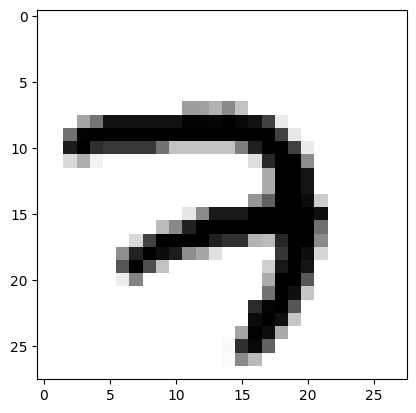

In [163]:
# Lets view some data 
plt.imshow(X_train[0], cmap="binary")
plt.show()

<Axes: >

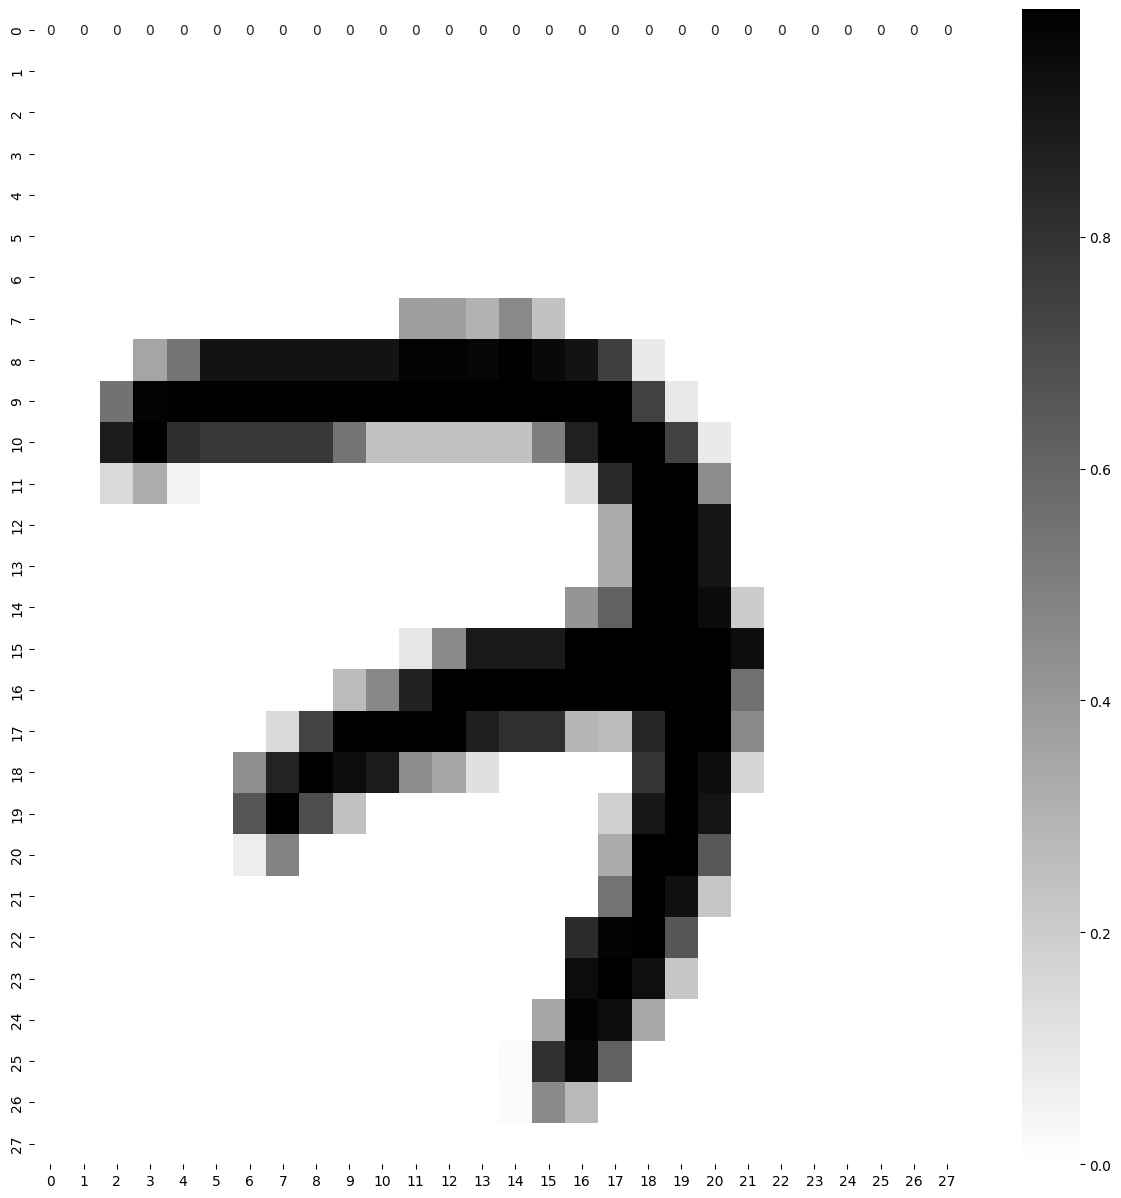

In [165]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")

In [166]:
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)

C:\Users\karth\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [167]:
model_clf.layers

[<Flatten name=inputLayer, built=True>,
 <Dense name=hiddenLayer1, built=True>,
 <Dense name=hiddenLayer2, built=True>,
 <Dense name=outputLayer, built=True>]

In [168]:
model_clf.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputLayer (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenLayer1 (Dense)            │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenLayer2 (Dense)            │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputLayer (Dense)             │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [173]:
# first Layer * second Layer + bias
784*300 + 300, 300*100+100, 100*10+10

(235500, 30100, 1010)

In [175]:
# Total parameters to be trained -
sum((235500, 30100, 1010))

266610

In [177]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [179]:
model_clf.get_layer(hidden1.name) is hidden1

True

In [181]:
len(hidden1.get_weights()[1])

300

In [183]:
hidden1.get_weights()

[array([[ 0.02124761, -0.04266944,  0.00848424, ...,  0.00822791,
         -0.02324854,  0.06519511],
        [ 0.04206645, -0.06059692,  0.00150568, ...,  0.06423765,
          0.03291087,  0.04065261],
        [ 0.02917872,  0.04973714,  0.07368428, ...,  0.02640595,
          0.03570568, -0.01016402],
        ...,
        [ 0.06431945,  0.01145979, -0.07225758, ..., -0.0492572 ,
          0.04145553,  0.0384305 ],
        [ 0.02487555, -0.0489577 ,  0.06458686, ...,  0.02714445,
          0.04523318,  0.0658759 ],
        [-0.05766202,  0.02870569, -0.06752182, ...,  0.0162852 ,
          0.03125745,  0.02010625]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [185]:
weights, biases = hidden1.get_weights()

In [187]:
print("shape\n",weights.shape, "\n")
weights

shape
 (784, 300) 



array([[ 0.02124761, -0.04266944,  0.00848424, ...,  0.00822791,
        -0.02324854,  0.06519511],
       [ 0.04206645, -0.06059692,  0.00150568, ...,  0.06423765,
         0.03291087,  0.04065261],
       [ 0.02917872,  0.04973714,  0.07368428, ...,  0.02640595,
         0.03570568, -0.01016402],
       ...,
       [ 0.06431945,  0.01145979, -0.07225758, ..., -0.0492572 ,
         0.04145553,  0.0384305 ],
       [ 0.02487555, -0.0489577 ,  0.06458686, ...,  0.02714445,
         0.04523318,  0.0658759 ],
       [-0.05766202,  0.02870569, -0.06752182, ...,  0.0162852 ,
         0.03125745,  0.02010625]], dtype=float32)

In [189]:
print("shape\n", biases.shape)

shape
 (300,)


In [191]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


# Tensorboard callback Functions

In [194]:
# Logging

import time 

def get_log_path(log_dir="logs/fit"):
  fileName = time.strftime("log_%Y_%m_%d_%H_%M_%S")
  logs_path = os.path.join(log_dir, fileName)
  print(f"Saving logs at {logs_path}")
  return logs_path

log_dir = get_log_path()
tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

Saving logs at logs/fit\log_2024_12_01_18_15_48


# Early Stopping callback

In [197]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

# Model checkpointing callback

In [200]:
CKPT_path = "Model_ckpt.keras"
checkpointing_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_path, save_best_only=True)

In [202]:
# Orginal train

EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32, callbacks=[tb_cb, early_stopping_cb,checkpointing_cb])

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7295 - loss: 1.0187 - val_accuracy: 0.9164 - val_loss: 0.3008
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9136 - loss: 0.3002 - val_accuracy: 0.9362 - val_loss: 0.2367
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9317 - loss: 0.2390 - val_accuracy: 0.9464 - val_loss: 0.2006
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9413 - loss: 0.2002 - val_accuracy: 0.9512 - val_loss: 0.1769
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9496 - loss: 0.1759 - val_accuracy: 0.9554 - val_loss: 0.1588
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9555 - loss: 0.1567 - val_accuracy: 0.9594 - val_loss: 0.1444
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9605 - loss: 0.1372 - val_accuracy: 0.9634 - val_loss: 0.1328
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9654 - loss: 0.1259 - 

In [203]:
# Checkpoint training

#loading Checkpoint model
ckpt_model = tf.keras.models.load_model(CKPT_path)

history = ckpt_model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32, callbacks=[tb_cb, early_stopping_cb,checkpointing_cb] )


Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9935 - loss: 0.0304 - val_accuracy: 0.9798 - val_loss: 0.0698
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9940 - loss: 0.0289 - val_accuracy: 0.9806 - val_loss: 0.0692
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9941 - loss: 0.0280 - val_accuracy: 0.9800 - val_loss: 0.0699
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9943 - loss: 0.0254 - val_accuracy: 0.9796 - val_loss: 0.0734
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9957 - loss: 0.0247 - val_accuracy: 0.9788 - val_loss: 0.0670
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9951 - loss: 0.0256 - val_accuracy: 0.9796 - val_loss: 0.0697
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9960 - loss: 0.0218 - val_accuracy: 0.9806 - val_loss: 0.0682
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9963 - loss: 0.0219 - 

# Saving the Model

In [241]:
import time
import os

def save_model_path(MODEL_dir = "TRAINED_MODEL"):
  os.makedirs(MODEL_dir, exist_ok= True)
  fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.keras")
  model_path = os.path.join(MODEL_dir, fileName)
  print(f"Model {fileName} will be saved at {model_path}")
  return model_path

In [243]:
UNIQUE_PATH = save_model_path()
UNIQUE_PATH 

Model Model_2024_12_01_18_20_09_.keras will be saved at TRAINED_MODEL\Model_2024_12_01_18_20_09_.keras


'TRAINED_MODEL\\Model_2024_12_01_18_20_09_.keras'

In [245]:
tf.keras.models.save_model(model_clf, UNIQUE_PATH)

In [217]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [219]:
# history.history

In [221]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.992945,0.031543,0.9798,0.069846
1,0.993164,0.029973,0.9806,0.069163
2,0.993927,0.028281,0.9800,0.069902
3,0.993927,0.026800,0.9796,0.073433
4,0.995091,0.025473,0.9788,0.066997
5,0.995418,0.023888,0.9796,0.069725
6,0.995691,0.022674,0.9806,0.068217
7,0.996055,0.021457,0.9812,0.067967
8,0.996473,0.020361,0.9810,0.065865
9,0.996964,0.019355,0.9800,0.067154


<Axes: >

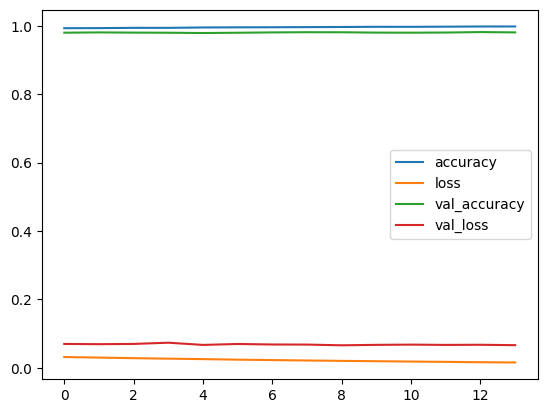

In [223]:
pd.DataFrame(history.history).plot()

In [225]:
model_clf.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9760 - loss: 0.0792


[0.06816721707582474, 0.979200005531311]

In [227]:
x_new = X_test[:3]
# x_new

In [229]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

In [231]:
y_prob = model_clf.predict(x_new)
y_prob.round(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


array([[0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.999, 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.996, 0.001, 0.   , 0.   , 0.   , 0.   , 0.001, 0.002,
        0.   ]], dtype=float32)

In [233]:
y_prob

array([[4.4871661e-07, 4.8919091e-08, 2.5616548e-05, 6.9433270e-04,
        1.1950971e-08, 6.9125143e-08, 1.6432851e-12, 9.9924433e-01,
        1.6084244e-06, 3.3550317e-05],
       [8.7576427e-07, 7.6675497e-05, 9.9955076e-01, 3.4261751e-04,
        4.6491349e-11, 1.8978197e-06, 2.7909132e-06, 8.5345467e-11,
        2.4379215e-05, 4.6306015e-12],
       [1.3905723e-05, 9.9551094e-01, 6.2097848e-04, 8.2985825e-05,
        2.5428677e-04, 8.5160376e-05, 4.0336224e-04, 1.4946697e-03,
        1.5042076e-03, 2.9399615e-05]], dtype=float32)

In [235]:
y_pred = np.argmax(y_prob, axis = -1)

In [237]:
y_pred

array([7, 2, 1], dtype=int64)

In [239]:
actual

array([7, 2, 1], dtype=uint8)

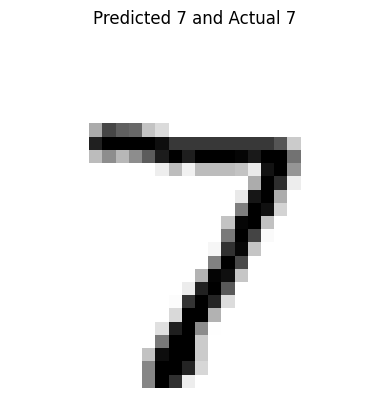

######################


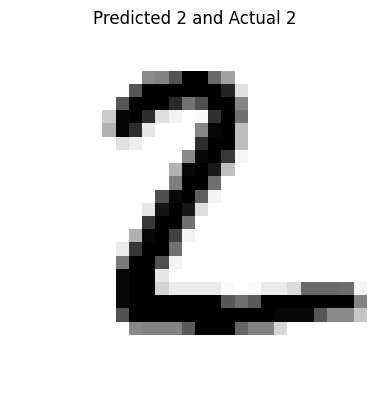

######################


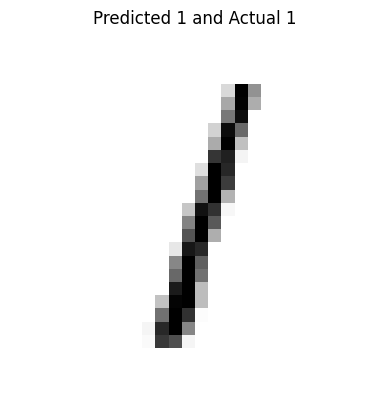

######################


In [257]:
# plot
for data, pred, actual_data in zip(x_new, y_pred, actual):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted {pred} and Actual {actual_data}")
  plt.axis("off")
  plt.show() 
  print("######################")

In [247]:
# Loading the model

path_name_model = 'TRAINED_MODEL\Model_2024_12_01_18_20_09_.keras'
loaded_model = tf.keras.models.load_model(path_name_model)
loaded_model.evaluate(X_test, y_test)

C:\Users\karth\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9760 - loss: 0.0792


[0.06816721707582474, 0.979200005531311]

In [249]:
result = loaded_model.predict(x_new)
y_pred = np.argmax(result, axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


In [251]:
y_pred

array([7, 2, 1], dtype=int64)

In [253]:
%load_ext tensorboard

In [255]:
%tensorboard --logdir logs/fit